### Pandas Funadamentals

Dataset to be used for Excersise - https://github.com/tategallery/collection

#### Overview and Why Use Pandas:

In [1]:
#Importing the required libraries here
#Here we import numpy as its closely related to pandas. (i.e Pandas uses numpy underneath)
import numpy as np
import pandas as pd
import os
import json
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
#Create and understand the one D Numpy Array
#Using Random Numbers
my_numpy_array = np.random.rand(3)
my_numpy_array

array([0.26444339, 0.76898973, 0.86946865])

In [3]:
#Check what dtype it belongs to
type(my_numpy_array)

numpy.ndarray

In [4]:
#Check how to retreive elements from numpy array
my_numpy_array[1]

0.768989734487287

In [5]:
#Create and understand a Pandas Series
my_series = pd.Series(my_numpy_array)
my_series

0    0.264443
1    0.768990
2    0.869469
dtype: float64

In [6]:
#Check the dtype of the series object and understand how its differing from numpy array/
#normal python array
type(my_series)

pandas.core.series.Series

In [7]:
#Understand how to retrive an element using index in pandas series
my_series[1]

0.768989734487287

In [8]:
#Understand how to convert numpy array to pandas series and print the same
#Also learn why we need pandas series while numpy array serves most of the purposes
#Pls Note the indexing change over here from normal integers to a categorical type
my_series = pd.Series(my_numpy_array, index=['One','Two','Three'])
my_series

One      0.264443
Two      0.768990
Three    0.869469
dtype: float64

In [9]:
#Understand how to retrieve a element from Pandas Series using indexing
my_series['One']

0.2644433856382349

In [10]:
#Experimented the behaviour of series while there were repeatitive indexes with same value.
#It can be seen that it does NOT behave like a HashMap and allows same name indexing.
my_series = pd.Series(my_numpy_array, index=['One','One','Three'])
my_series

One      0.264443
One      0.768990
Three    0.869469
dtype: float64

In [12]:
#Upon Trying to Print the repeatitive index it gives the two elements indexed
#It can also be noted that even though the display indices got changed to categorical values
#default integer indexing still work and while retrieving using that it returns only unique value
print(my_series['One'],my_series[1])

One    0.264443
One    0.768990
dtype: float64 0.768989734487287


In [13]:
#But upon printing the indices we see the one we defined and not the default one
my_series.index

Index(['One', 'One', 'Three'], dtype='object')

In [14]:
#Here we try to understand how a 2 d array is created and initialized in numpy
array2d = np.random.rand(3,2)
array2d

array([[0.11753655, 0.64036449],
       [0.23813861, 0.81160516],
       [0.69874856, 0.28270064]])

In [15]:
#We try to retrieve the element using its index. It should be [row,column] to get one
#element.
array2d[0,1]

0.6403644920018188

In [16]:
#Using 2D arrays we try to wrap this up into a Pandas Dataframe and print the same
df = pd.DataFrame(array2d)
df

,0,1
0,0.117537,0.640364
1,0.238139,0.811605
2,0.698749,0.282701


In [17]:
#However when we try to retrive an element using its index just like a 2D numpy array
#it gives an error. So it can be infered its not possible to loop into dataframe this way.
df[0,1]

KeyError: (0, 1)

In [18]:
#Printing the below statement displays all column names that are found in dataframe.
#Note: This can be updated as per custom needs
df.columns

RangeIndex(start=0, stop=2, step=1)

In [19]:
#Here as mentioned above we try to update the column names of the dataframe
df.columns = ['One', 'Two']
df

,One,Two
0,0.117537,0.640364
1,0.238139,0.811605
2,0.698749,0.282701


In [20]:
#We try to print the column values in a dataframe. This can be done by suffixing the column name
#as below.
df['Two']

0    0.640364
1    0.811605
2    0.282701
Name: Two, dtype: float64

#### Reading Files/Data in Pandas:

In [28]:
#Here we try to read a csv file and try printing the same
#It can be seen that pandas reads the file to a dataframe and prints the same while sought for
artwork_df = pd.read_csv('artwork_data.csv', nrows=5)
artwork_df

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785.0,1922,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826.0,1919,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [29]:
#It can be observed from above display that by default the dataset comes with an id
#Hence we can make that id as the default one against the one introduced by pandas
artwork_df = pd.read_csv('artwork_data.csv', nrows=5, index_col='id')
artwork_df

,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
id,,,,,,,,,,,,,,,,,,,
1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785.0,1922,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826.0,1919,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [35]:
#It can be seen by default pandas reads in all columns in a file into dataframe
#If in case our analysis demands only a few columns we can specify pandas what columns to
#read and load into the memory
artwork_df = pd.read_csv('artwork_data.csv', nrows=5, index_col='id', usecols=['id','artist'])
artwork_df

,artist
id,
1035,"Blake, Robert"
1036,"Blake, Robert"
1037,"Blake, Robert"
1038,"Blake, Robert"
1039,"Blake, William"


In [37]:
#The same import as the previous cell is done here but with few more columns
#Here it can be seen that pandas throws a warning which might be caused because either junk values
#being present in data/the data itself is huge.
#We might have to take the appropriate size by adjusting the dtype options or setting memory low option
#as false.
COLS_TO_USE = ['id', 'artist', 'title', 'medium', 'year', 'acquisitionYear', 'height', 'width', 'units']
artwork_df = pd.read_csv('artwork_data.csv', index_col='id', usecols=COLS_TO_USE)
artwork_df.head()

C:\Users\thiru\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419.0,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213.0,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343,467.0,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394.0,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243,335.0,mm


In [38]:
#We can then save the dataframe that we imported as a serializable pickle file
#This can be helpful if the dataset is very huge and we intend to use a very small portion of it
#for our analysis
artwork_df.to_pickle('artwork_df.pickle')

In [39]:
#Moving on we try to read plain records objects in pandas
#Here the below is the value of the data records
records = [('Espresso', 10), ('Full White',20)]
records

[('Espresso', 10), ('Full White', 20)]

In [40]:
#We use dataframe.from_records to read the records into memory
records_df = pd.DataFrame.from_records(records)
records_df

,0,1
0,Espresso,10
1,Full White,20


In [41]:
#It can be seen above that pandas reads the data records and by default assigns
#them numeric index column labels.
#It can be changed to adapt custom labels by using the columns attribute
records_df = pd.DataFrame.from_records(records, columns=['Coffee', 'Price'])
records_df

,Coffee,Price
0,Espresso,10
1,Full White,20


In [42]:
#Next we try to specify the columns we want to retrive from a Json file similar
#to the CSV above.
KEYS_TO_USE = ['id', 'all_artists', 'title', 'medium', 'acquisitionYear', 'height', 'width']

In [43]:
#Looking at the structure of json file, we can conclude that there exists one
#record per file. In order to read a record into the memory from the file
#the below function is used.
def get_record_from_file(file_path, keys_to_use):
    with open(file_path) as artwork_file:
        content = json.load(artwork_file)
    record = []
    for field in keys_to_use:
        record.append(content[field])
    return tuple(record)

In [44]:
#Here we try to pass one file to the above function and see how it behaves.
#It can be clearly seen that the function returns a tuple by retrieving the 
#required columns from the file
SAMPLE_JSON = os.path.join(os.getcwd(),'collection-master','collection-master','artworks'
                          ,'a','000','a00001-1035.json')
sample_record = get_record_from_file(SAMPLE_JSON, KEYS_TO_USE)
sample_record

(1035,
 'Robert Blake',
 'A Figure Bowing before a Seated Old Man with his Arm Outstretched in Benediction. Verso: Indecipherable Sketch',
 'Watercolour, ink, chalk and graphite on paper. Verso: graphite on paper',
 1922,
 '419',
 '394')

In [45]:
#Now that we have the core logic to retreive data from the data file, we can
#use the below funtion to traverse thru all directories and all files and retrive
#the data into memory
def read_artworks_from_json(keys_to_use):
    JSON_ROOT = os.path.join(os.getcwd(),'collection-master','collection-master','artworks')
    artworks = []
    for root, _, files in os.walk(JSON_ROOT):
        for f in files:
            if f.endswith('json'):
                record = get_record_from_file(os.path.join(root,f), keys_to_use)
                artworks.append(record)
            break
    df = pd.DataFrame.from_records(artworks,
                                  columns=keys_to_use,
                                   index='id')
    return df

In [46]:
#Invoking the above function with the keys that we need from the files whhich corresponds to
#the columns we intend to use we obtain the below dataframe
df = read_artworks_from_json(KEYS_TO_USE)

In [47]:
df

,all_artists,title,medium,acquisitionYear,height,width
id,,,,,,
1035,Robert Blake,A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",1922,419,394
20230,"Sir Edward Coley Burne-Jones, Bt",Study of Heads for a Pietà,Graphite and chalk on paper,1927,154,136
6725,Arthur Boyd Houghton,[title not known],Graphite on paper,1922,,
7330,George Jones,[title not known],Ink on paper,1888,,
7430,George Jones,[title not known],Ink on paper,1888,,
...,...,...,...,...,...,...
118532,Trevor Bell,Place,Acrylic paint on paper,2012,980,750
117815,Jiro Takamatsu,Shadow,Graphite on paper,2012,181,260
117484,Shelagh Cluett,Flux III,"Steel, bitumen, latex, clay and cotton string",2012,950,2430


#### Indexing and Filtering:

In [49]:
#Using CSV obtained dataframe here
artwork_df

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419.0,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213.0,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343,467.0,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394.0,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243,335.0,mm
...,...,...,...,...,...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,305,305.0,mm
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,305,305.0,mm
121181,"Hatoum, Mona",Present Tense,Soap and glass beads,1996,2013.0,45,2410.0,mm


In [50]:
#Here we try to pull out the rquired columns alone.
#Note that there are many ways of doing it, but this one is one among those
artwork_df[['title', 'artist']]

,title,artist
id,,
1035,A Figure Bowing before a Seated Old Man with h...,"Blake, Robert"
1036,"Two Drawings of Frightened Figures, Probably f...","Blake, Robert"
1037,The Preaching of Warning. Verso: An Old Man En...,"Blake, Robert"
1038,Six Drawings of Figures with Outstretched Arms,"Blake, Robert"
1039,The Circle of the Lustful: Francesca da Rimini...,"Blake, William"
...,...,...
122960,Larvae (from Tampax Romana),"P-Orridge, Genesis"
122961,Living Womb (from Tampax Romana),"P-Orridge, Genesis"
121181,Present Tense,"Hatoum, Mona"


In [51]:
#Another method to accomplish the same would be as below, but this one is least recommended
#as it might be unstable in certain cases
artwork_df.artist

id
1035           Blake, Robert
1036           Blake, Robert
1037           Blake, Robert
1038           Blake, Robert
1039          Blake, William
                 ...        
122960    P-Orridge, Genesis
122961    P-Orridge, Genesis
121181          Hatoum, Mona
112306         Creed, Martin
127035     Brunias, Agostino
Name: artist, Length: 69201, dtype: object

In [52]:
#Here we try to pull out the unique artists from a column. It can be seen that pandas supports a
#function called unique which might be leveraged to get this job done and it returns a numpy array
artists = artwork_df['artist']
unique_artists = pd.unique(artists)
unique_artists

array(['Blake, Robert', 'Blake, William', 'Richmond, George', ...,
       'Sterne, Hedda', 'P-Orridge, Genesis', 'Brunias, Agostino'],
      dtype=object)

In [53]:
#Retreiving the len of the returned array we can find the number of unique values in column artist
len(unique_artists)

3336

In [54]:
#Here we try to retreive the artist matching Robert Blake and see how many match the same
#The below operation returns a boolean series matching the given condition
robert_blake_series = artwork_df['artist']=='Blake, Robert'
robert_blake_series

id
1035       True
1036       True
1037       True
1038       True
1039      False
          ...  
122960    False
122961    False
121181    False
112306    False
127035    False
Name: artist, Length: 69201, dtype: bool

In [57]:
#From the above boolean series we retrieve the number of Trues and False using the value_counts
#which returns the distinct count of all values. Count againt the number of Trues gives the total count
#of Robert Blake
robert_blake_series.value_counts()

False    69197
True         4
Name: artist, dtype: int64

In [85]:
#There is one another way to accomplish the above without using boolean series
#Here we try to count the distinct values straight out of the dataframe and retreive the value against
#Robert Blake and it gives us the count
artists = artwork_df['artist'].value_counts()
artists['Blake, Robert']

4

In [59]:
#loc and Iloc
#loc - returns values as per the row index and column labels
#iloc - returns values based on 0 based indices
artwork_df.loc[1070,'artist']

'Blake, William'

In [60]:
artwork_df.iloc[231,0]

'Jones, George'

In [61]:
#Note - : here retrives all values of the row-231
artwork_df.iloc[231,:]

artist                 Jones, George
title              [title not known]
medium                  Ink on paper
year                             NaN
acquisitionYear               1888.0
width                            NaN
height                           NaN
units                            NaN
Name: 7265, dtype: object

In [62]:
#The below retreives all values of column 0
artwork_df.iloc[:,0]

id
1035           Blake, Robert
1036           Blake, Robert
1037           Blake, Robert
1038           Blake, Robert
1039          Blake, William
                 ...        
122960    P-Orridge, Genesis
122961    P-Orridge, Genesis
121181          Hatoum, Mona
112306         Creed, Martin
127035     Brunias, Agostino
Name: artist, Length: 69201, dtype: object

In [63]:
#The below returns a range of values between row-[0-2] and columns-[0-2]
artwork_df.iloc[0:2,0:2]

,artist,title
id,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f..."


In [64]:
#Now that we know how to retreive columns, we try to multiply width and height of the df to get the
#area of the art.
#It can be seen from the below that the multiplication is not possible as both the columns do contain
#non-numeric attributes
artwork_df['width'] * artwork_df['height']

TypeError: can't multiply sequence by non-int of type 'float'

In [65]:
#On applying sort and filtering on head we see some strings are being contained in the column
artwork_df['width'].sort_values().head()

id
20822            (1):
105337    (diameter):
98671         (each):
76420         (each):
91391        (image):
Name: width, dtype: object

In [66]:
#The tail portion also has some missing entries, but it has been rightly populated with NAN values
artwork_df['width'].sort_values().tail()

id
121283    NaN
117863    NaN
120549    NaN
122900    NaN
112306    NaN
Name: width, dtype: object

In [67]:
#Now when we try to make them numeric straight away, it fails with the below error as strings cannot by
#default be casted to numbers
pd.to_numeric(artwork_df['width'])

ValueError: Unable to parse string "(upper):" at position 1839

In [68]:
#Pandas However allows us to specify what to do when encountered with such kinda strange attribues
#The option set of errors=coerce will allow to convert strings to NAN values
pd.to_numeric(artwork_df['width'], errors='coerce')

id
1035      394.0
1036      311.0
1037      343.0
1038      318.0
1039      243.0
          ...  
122960    305.0
122961    305.0
121181     45.0
112306      NaN
127035    508.0
Name: width, Length: 69201, dtype: float64

In [69]:
#Setting the above series to the column width in our df we see now that the width attribute is
#fully numeric
artwork_df['width'] = pd.to_numeric(artwork_df['width'], errors='coerce')
artwork_df['width'].dtypes

dtype('float64')

In [70]:
#The same pull above is done with the help of loc as its more powerful than the normal column name
#specified pull
artwork_df.loc[:,'width']

id
1035      394.0
1036      311.0
1037      343.0
1038      318.0
1039      243.0
          ...  
122960    305.0
122961    305.0
121181     45.0
112306      NaN
127035    508.0
Name: width, Length: 69201, dtype: float64

In [71]:
#Repeating the same procedure for height, we now get the height column as numeric too
artwork_df.loc[:,'height'] = pd.to_numeric(artwork_df['height'], errors='coerce')
artwork_df['height'].dtypes

dtype('float64')

In [72]:
#Finding the area now, returns a series comprising of area of each artwork
area = artwork_df['height'] * artwork_df['width']
area

id
1035      165086.0
1036       66243.0
1037      160181.0
1038      125292.0
1039       81405.0
            ...   
122960     93025.0
122961     93025.0
121181    108450.0
112306         NaN
127035    335280.0
Length: 69201, dtype: float64

In [73]:
#Appending the same to the main Dataframe, we get one area column in addition to the original one
artwork_df = artwork_df.assign(area=area)
artwork_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394.0,419.0,mm,165086.0
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311.0,213.0,mm,66243.0
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343.0,467.0,mm,160181.0
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318.0,394.0,mm,125292.0
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243.0,335.0,mm,81405.0
...,...,...,...,...,...,...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,305.0,305.0,mm,93025.0
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,305.0,305.0,mm,93025.0
121181,"Hatoum, Mona",Present Tense,Soap and glass beads,1996,2013.0,45.0,2410.0,mm,108450.0


In [74]:
#Retreving the maximum of the area, we find the below value
artwork_df['area'].max()

132462000.0

In [75]:
#To pull the id containing the max area we use the idxmax
artwork_df['area'].idxmax()

98367

In [76]:
#Finally we retrieve the record wholly and see who has contributed to the largest area art over here
#Using loc wrapper on the above logic the same is obtained
artwork_df.loc[artwork_df['area'].idxmax(),:]

artist                               Therrien, Robert
title                No Title (Table and Four Chairs)
medium             Aluminium, steel, wood and plastic
year                                           2003.0
acquisitionYear                                2008.0
width                                          8920.0
height                                        14850.0
units                                              mm
area                                      132462000.0
Name: 98367, dtype: object

#### Operation on Groups:

In [77]:
#Now we try to operate on certain constructs and grouping in pandas. For this purpose we try to
#create a small-dataframe from the main dataframe
small_df = artwork_df.iloc[49980:50020,:].copy()
small_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
16412,Wols,[no title],Etching on paper,1937.0,1983.0,130.0,80.0,mm,10400.0
16413,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,187.0,102.0,mm,19074.0
16414,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,248.0,168.0,mm,41664.0
16415,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,149.0,102.0,mm,15198.0
16416,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,203.0,120.0,mm,24360.0
16417,Wols,[no title],Etching on paper,1937.0,1983.0,130.0,79.0,mm,10270.0
16418,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,124.0,98.0,mm,12152.0
16419,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,140.0,89.0,mm,12460.0
16420,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,140.0,86.0,mm,12040.0


In [78]:
#Using the groupby function of the pandas and grouping based on the column artist we get a pandas
#group object
grouped = small_df.groupby('artist')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [81]:
#Aggregation
#Iterating thru the grouped objects we print the artist's name and the year his artwork was purchased first
#using the min construct
for name, groupedDf in grouped:
    print("{}:{}".format(name,groupedDf['acquisitionYear'].min()))

Disler, Martin:1983.0
Frost, Sir Terry:1983.0
Phillips, Esq Tom:1983.0
Wols:1983.0


In [82]:
#Transformation
#Now for the purpose of checking transformation we try to make a couple of values
#NaN and then try to transform them using the most frequent value for the group
small_df.loc[11838,'medium'] = np.nan
small_df.loc[16412,'medium'] = np.nan
small_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
16412,Wols,[no title],NaN,1937.0,1983.0,130.0,80.0,mm,10400.0
16413,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,187.0,102.0,mm,19074.0
16414,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,248.0,168.0,mm,41664.0
16415,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,149.0,102.0,mm,15198.0
16416,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,203.0,120.0,mm,24360.0
16417,Wols,[no title],Etching on paper,1937.0,1983.0,130.0,79.0,mm,10270.0
16418,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,124.0,98.0,mm,12152.0
16419,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,140.0,89.0,mm,12460.0
16420,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,140.0,86.0,mm,12040.0


In [86]:
#For the above purpose the below logic does the need. Here we retrieve the 
#most common value from the given series and use the fillna to replace na with
#the same.
def fill_values(series):
    values_counted = series.value_counts()
    if values_counted.empty:
        return series
    most_frequent = values_counted.index[0]
    new_medium = series.fillna(most_frequent)
    return new_medium

In [87]:
#In order to transform the above values which we made NaN we try to first group
#the df here using artists column. We then send the resultant series obtained in
#each group to the above logic and fill the same with the most freq values
def transform_df(source_df):
    group_dfs = []
    for name, group_df in source_df.groupby('artist'):
        filled_df = group_df.copy()
        filled_df.loc[:,'medium'] = fill_values(group_df['medium'])
        group_dfs.append(filled_df)
    new_df = pd.concat(group_dfs)
    return new_df

In [88]:
#Here we invoke the above function using our main df and catch the result in
#a new dataframe. It can be seen that the group which had the most frq values
#got replaced with the same and the one with only one value was'nt altered as 
#there were no value except NaN in that group
filled_df = transform_df(small_df)
filled_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
3926,"Disler, Martin",[no title],Etching on paper,1981.0,1983.0,556.0,750.0,mm,417000.0
4704,"Frost, Sir Terry",Blue Moon,Lithograph on paper,1952.0,1983.0,355.0,273.0,mm,96915.0
4705,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1952.0,1983.0,132.0,143.0,mm,18876.0
4706,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954.0,1983.0,131.0,155.0,mm,20305.0
4707,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954.0,1983.0,193.0,267.0,mm,51531.0
4708,"Frost, Sir Terry",Leeds,Drypoint on paper,1956.0,1983.0,125.0,167.0,mm,20875.0
4709,"Frost, Sir Terry","Camping, Anduze",Etching on paper,1979.0,1983.0,257.0,209.0,mm,53713.0
4710,"Frost, Sir Terry","Umea, Sweden",Etching on paper,1979.0,1983.0,NaN,NaN,NaN,NaN
4711,"Frost, Sir Terry",Self-Portrait,Etching on paper,1980.0,1983.0,277.0,200.0,mm,55400.0


In [89]:
#Observing the shortcuts available for the same in pandas, we see that the above operations
#become fairly simple.
#Here we try to replicate the tranform logic what we tried primitivly.
#We first return the group by object passing the constructs we want to group with
grouped_mediums = small_df.groupby('artist')['medium']
grouped_mediums

In [91]:
#Next we pass the same to the pandas inbuilt transform method and pass the
#above obtained series. Finally we assign the same to the main dataframe
small_df.loc[:,'medium'] = grouped_mediums.transform(fill_values)

In [92]:
#Printing the main dataframe we see the same results as obtained in the above
small_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
16412,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,130.0,80.0,mm,10400.0
16413,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,187.0,102.0,mm,19074.0
16414,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,248.0,168.0,mm,41664.0
16415,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,149.0,102.0,mm,15198.0
16416,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,203.0,120.0,mm,24360.0
16417,Wols,[no title],Etching on paper,1937.0,1983.0,130.0,79.0,mm,10270.0
16418,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,124.0,98.0,mm,12152.0
16419,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,140.0,89.0,mm,12460.0
16420,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,140.0,86.0,mm,12040.0


In [93]:
#Shortcut for aggregation
#Instead of the complex logic we wrote above pandas provides 2 simple ways to
#accomplish this. Here we try to group the values based on artist column
#and then pick the acquisitionYear minimum from the group for every group
small_df.groupby('artist')['acquisitionYear'].agg(np.min)

artist
Disler, Martin       1983.0
Frost, Sir Terry     1983.0
Phillips, Esq Tom    1983.0
Wols                 1983.0
Name: acquisitionYear, dtype: float64

In [94]:
#The same logic as above can also be completed without numpy using pandas built in min
small_df.groupby('artist')['acquisitionYear'].min()

artist
Disler, Martin       1983.0
Frost, Sir Terry     1983.0
Phillips, Esq Tom    1983.0
Wols                 1983.0
Name: acquisitionYear, dtype: float64

In [95]:
#Filtering
#We finally try to group by based on the title. We can clearly observe that
#there are only 2 titles recurring more than once
grouped_titles = small_df.groupby('title')
title_counts = grouped_titles.size().sort_values(ascending=False)
title_counts

title
[no title]         31
Boat Shapes         3
Blue Moon           1
Camping, Anduze     1
Leeds               1
Self-Portrait       1
Umea, Sweden        1
[colophon]          1
dtype: int64

In [96]:
#Upon using lambdas to mimic the above logic and passing the condn to the
#filter we filter out the values as specified in condn and leave off the rest
#Finally we sort the same using the title occurance count and print the df
condn = lambda x: len(x) > 1
dup_titles_df = grouped_titles.filter(condn)
dup_titles_df.sort_values('title', inplace=True)
dup_titles_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
4707,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954.0,1983.0,193.0,267.0,mm,51531.0
4706,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954.0,1983.0,131.0,155.0,mm,20305.0
4705,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1952.0,1983.0,132.0,143.0,mm,18876.0
16430,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,118.0,95.0,mm,11210.0
16431,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,140.0,79.0,mm,11060.0
16432,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,124.0,95.0,mm,11780.0
16433,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,105.0,73.0,mm,7665.0
16434,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,121.0,102.0,mm,12342.0
16435,Wols,[no title],Etching and drypoint on paper,1937.0,1983.0,121.0,92.0,mm,11132.0


#### Outputting Data to Files:

In [97]:
#Here we try to write the dataframe to excel. Pandas provides an inbuilt
#method call to write this to xlsx
small_df.to_excel('Basic.xlsx')

In [98]:
#Providing index=False on the same method we get data only outputted to excel
#without index of the dataframe
small_df.to_excel('no-index.xlsx', index=False)

In [99]:
#There is also a columns option which allows us to specify what columns
#we need to pick from in the to_excel method
small_df.to_excel('columns.xlsx', columns = ['artist','title','year'])

In [100]:
#Upon interested in doing further processing we first try to write data
#to multiple sheets and we can accomplish the same using excelwriter object
#and passing the same to the dataframe to excel method call
writer = pd.ExcelWriter('multiple-sheets.xlsx', engine = 'xlsxwriter')
small_df.to_excel(writer, sheet_name='small_df', index=False)
dup_titles_df.to_excel(writer, sheet_name='dup_titles_df', index=False)
writer.save()

In [101]:
#The below call allows us to store dataframe values in a database table
with sqlite3.connect('my_database.db') as conn:
    small_df.to_sql('Tate_1', conn)

In [102]:
#Here we try to store the dataframe as a json file. The to_json method invoke
#allows us to accomplish the same.
small_df.to_json('default.json')

In [103]:
#Similar to the to_excel call the to_json also provides with several options
#and using orient=table we get a json with schema ans few other formatting 
#specific to table orientation
small_df.to_json('default-orient.json', orient='table')

#### Plotting:

In [104]:
#Here we try to get the counts of every acquisitionYears. It is then pulled inside a dataframe
#and the is printed as below
artwork_df_acquisitionYear = artwork_df.groupby('acquisitionYear').size()
artwork_df_acquisitionYear

acquisitionYear
1823.0       1
1824.0       2
1826.0       4
1827.0       1
1828.0       3
          ... 
2009.0    1364
2010.0     392
2011.0     320
2012.0     514
2013.0     458
Length: 178, dtype: int64

<AxesSubplot:xlabel='acquisitionYear'>

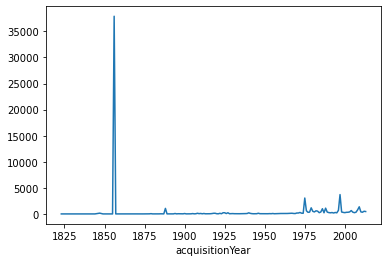

In [105]:
#Upon trying to plot using pandas.plot which uses matplotlib underneath we get the below plot
artwork_df_acquisitionYear.plot()

In [106]:
#Customizing the default behaviour to a certain extent below we get the final plot as below
rcParams.update({'figure.autolayout': True,
                 'axes.titlepad': 20})

In [107]:
title_font = {'family': 'source sans pro',
             'color': 'darkblue',
             'weight': 'normal',
             'size': 20}

label_font = {'family': 'consolas',
             'color': 'darkred',
             'weight': 'normal',
             'size': 16}

Text(0.5, 1.0, 'Tate Gallery Acquisitions')

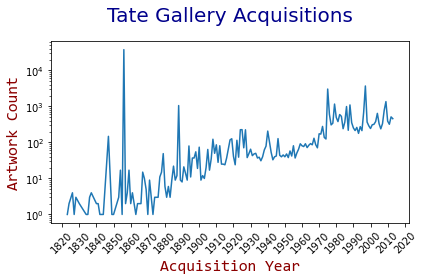

In [114]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
artwork_df_acquisitionYear.plot(ax=subplot, rot=45, logy=True)
subplot.set_xlabel('Acquisition Year', fontdict=label_font)
subplot.set_ylabel('Artwork Count', fontdict=label_font)
subplot.locator_params(nbins=40, axis='x')
subplot.set_title('Tate Gallery Acquisitions', fontdict=title_font)

In [117]:
#Finally we try to save the plots as images..both in png and svg formats
fig.savefig('plot.png')

In [118]:
fig.savefig('plot.svg', format='svg')